# Práctica Color

### Importo Librerias

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import imageio
import math
import copy
import numpy.linalg as linalg
from scipy.signal import convolve2d
from skimage import color

### Importo imagenes

In [3]:
imgNaranjo = imageio.imread('img/color/naranjo.jpg')
imgCrayones = imageio.imread('img/color/crayones.tif')
imgJonah = imageio.imread('img/color/jonah.jpg')
imgBsas = imageio.imread('img/color/bsas.jpg')
imgBotellas = imageio.imread('img/color/botellas.tif')
imgFlores = imageio.imread('img/color/flores.tif')

def mostrarImagen(img, cmap=None, norm=False):
    plt.imshow(img, cmap=cmap)
    plt.show()

def calcNivelesGrises(img):
    return np.iinfo(img.dtype).max+1

# Ejercicio 1

In [53]:
def sumarIntensidad(img, c):
    img = color.rgb2hsv(img)
    img[:,:,2] += c
    img = color.hsv2rgb(img)
    return img

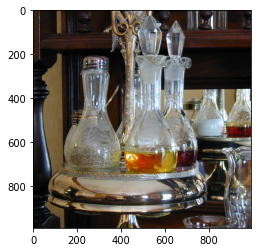

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


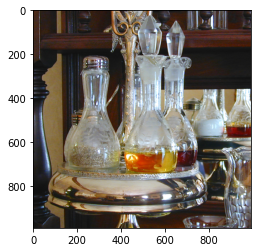

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


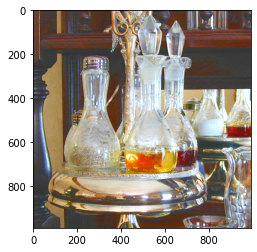

In [54]:
mostrarImagen(imgBotellas)
mostrarImagen(sumarIntensidad(imgBotellas,0.06))
mostrarImagen(sumarIntensidad(imgBotellas,0.2))

# Ejercicio 2

In [3]:
def multSaturacion(img, c):
    imgHSV = color.rgb2hsv(img)
    imgHSV[:,:,1] *= c
    return color.hsv2rgb(imgHSV)

def sumarHue(img, c):
    img = color.rgb2hsv(img)
    img[:,:,0] += c
    img = color.hsv2rgb(img)
    return img

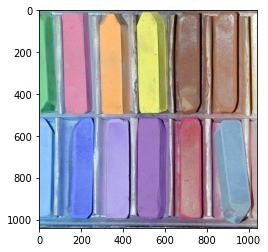

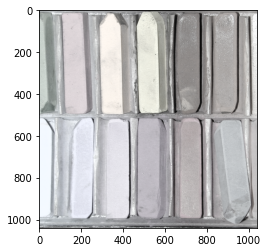

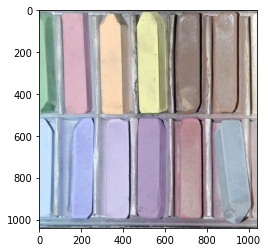

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


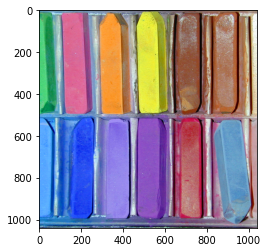

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


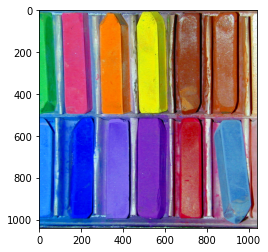

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


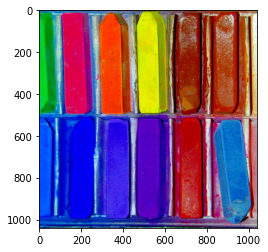

In [33]:
mostrarImagen(imgCrayones)
mostrarImagen(multSaturacion(imgCrayones,0.1))
mostrarImagen(multSaturacion(imgCrayones,0.5))
mostrarImagen(multSaturacion(imgCrayones,1.5))
mostrarImagen(multSaturacion(imgCrayones,2))
mostrarImagen(multSaturacion(imgCrayones,3))

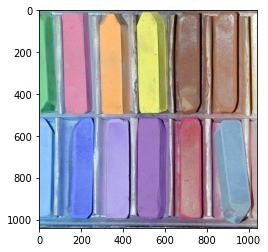

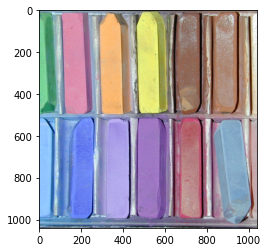

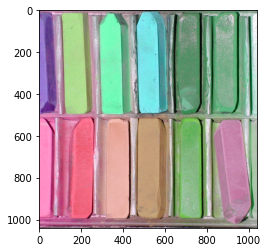

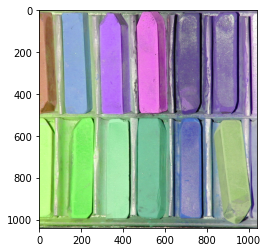

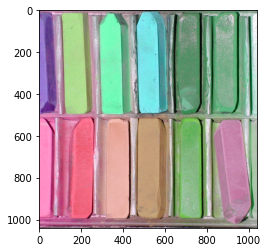

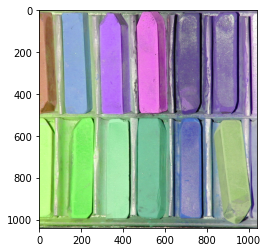

In [32]:
mostrarImagen(imgCrayones)
mostrarImagen(sumarHue(imgCrayones,10))
mostrarImagen(sumarHue(imgCrayones,50))
mostrarImagen(sumarHue(imgCrayones,100))
mostrarImagen(sumarHue(imgCrayones,200))
mostrarImagen(sumarHue(imgCrayones,250))

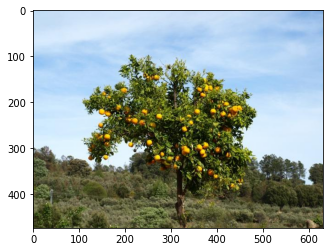

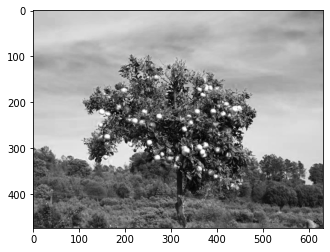

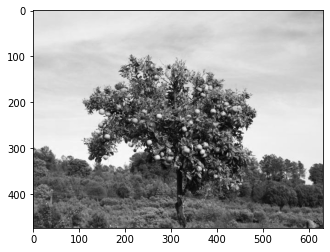

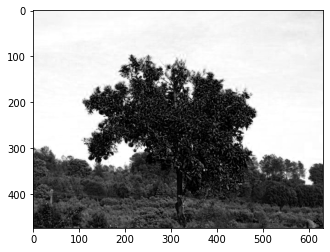

In [47]:
mostrarImagen(imgNaranjo)
mostrarImagen(imgNaranjo[:,:,0], cmap='gray')
mostrarImagen(imgNaranjo[:,:,1], cmap='gray')
mostrarImagen(imgNaranjo[:,:,2], cmap='gray')

# Ejercicio 3

## a)

In [5]:
def distMahalanobis(z, a):
    return math.sqrt(np.dot(np.dot((z-a).T, 1/np.cov(a)),(z-a)))

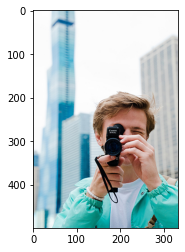

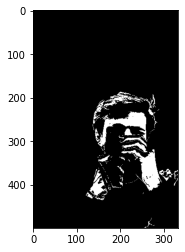

In [27]:
colores_piel = np.array([
    [192,132,113],
    [199,160,145],
    [189,138,106],
    [211,161,150]])

r = 1.5 # Radio bola
z = np.array([np.mean(colores_piel[:,0]), np.mean(colores_piel[:,1]), np.mean(colores_piel[:,2])]) # Promedio color piel

mostrarImagen(imgJonah)
Dst = np.zeros((len(imgJonah),len(imgJonah[0])))
for i in range(len(Dst)):
    for j in range(len(Dst[0])):
        #print(distMahalanobis(imgJonah[i][j], z))
        if distMahalanobis(imgJonah[i][j], z) < r:
            Dst[i][j] = 255

    
mostrarImagen(Dst, cmap='gray')

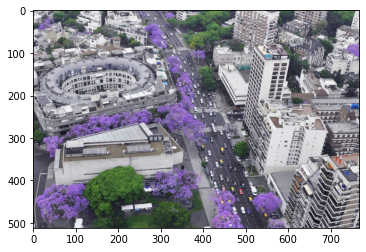

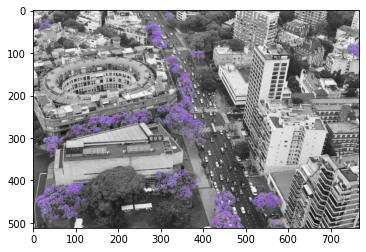

In [30]:
colores = np.array([
    [131,90,186],
    [165,119,218]])

r = 1 # Radio bola
z = np.array([np.mean(colores[:,0]), np.mean(colores[:,1]), np.mean(colores[:,2])]) # Promedio

mostrarImagen(imgBsas)
Dst = copy.deepcopy(imgBsas)
for i in range(len(Dst)):
    for j in range(len(Dst[0])):
        if distMahalanobis(imgBsas[i][j], z) > r: #Transformo
            gs = color.rgb2gray(imgBsas[i][j])
            Dst[i][j] = color.gray2rgb(gs)*255
    
mostrarImagen(Dst)

## b)

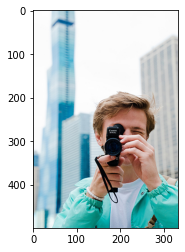

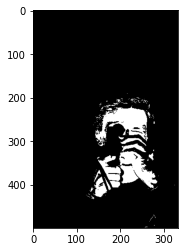

In [45]:
def distMahalanobisYCBCR(z, a):
    z2 = color.rgb2ycbcr(z)[1:]
    a2 = color.rgb2ycbcr(a)[1:]
    return math.sqrt(np.dot(np.dot((z2-a2).T, 1/np.cov(a2)),(z2-a2)))

colores_piel = np.array([
    [192,132,113],
    [199,160,145],
    [189,138,106],
    [211,161,150]])

r = 1.0145 # Radio bola
z = np.array([np.mean(colores_piel[:,0]), np.mean(colores_piel[:,1]), np.mean(colores_piel[:,2])]) # Promedio color piel

mostrarImagen(imgJonah)
Dst = np.zeros((len(imgJonah),len(imgJonah[0])))
for i in range(len(Dst)):
    for j in range(len(Dst[0])):
        #print(distMahalanobisYCBCR(imgJonah[i][j], z))
        if distMahalanobisYCBCR(imgJonah[i][j], z) < r:
            Dst[i][j] = 255

mostrarImagen(Dst, cmap='gray')

# Ejercicio 4

In [5]:
import cv2
img = cv2.imread('img/color/naranjo.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

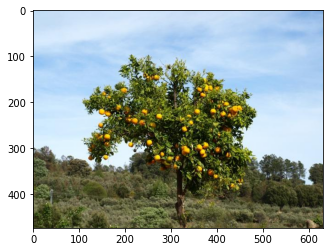

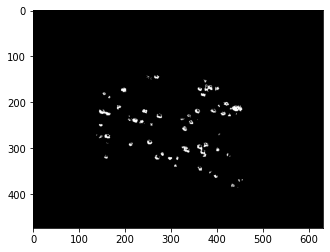

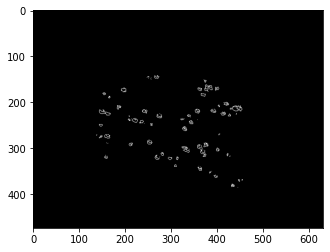

Hay 152 naranjas


In [44]:
mostrarImagen(img)

# generar una matriz naranjas binaria con los pixeles pertenecientes a naranjas en 1 y 0 en los otros.
######################################################################################################

color_naranjas = np.array([[255,115,0],
                           [253,188,2],
                           [207,154,0],
                           [206,154,9],
                           [214,173,33]])

r = 0.6
z = np.array([np.mean(color_naranjas[:,0]), np.mean(color_naranjas[:,1]), np.mean(color_naranjas[:,2])])

naranjas = np.zeros((len(img),len(img[0])), dtype=np.uint8)
for i in range(len(naranjas)):
    for j in range(len(naranjas[0])):
        if distMahalanobis(img[i][j], z) < r:
            naranjas[i][j] = 255
        else:
            naranjas[i][j] = 0

#####################################################################################################

mostrarImagen(naranjas,cmap='gray')

cont0, hierarchy = cv2.findContours(naranjas.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

contornos = cont0
# graficar los contornos restantes
h, w = naranjas.shape[:2]
vis = np.zeros((h, w), np.uint8)
for i in range(0,len(contornos)-1):
    cv2.drawContours( vis, contornos, i, 255)

mostrarImagen(vis,cmap='gray')
print('Hay %d naranjas' % len(contornos))

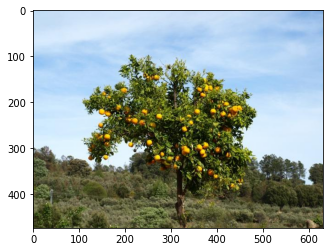

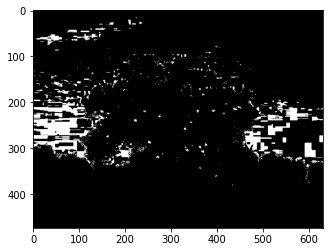

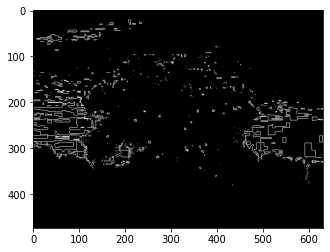

Hay 726 naranjas


In [7]:
def hsv2textonspace(a):
    return np.array([a[2],a[1]*math.sin(a[0]),a[1]*math.cos(a[0])])

def rgb2textonspace(a):
    return hsv2textonspace(color.rgb2hsv(a))

def distMahalanobisTextonSpace(z,a):
    z2 = rgb2textonspace(z)
    a2 = rgb2textonspace(a)
    return math.sqrt(np.dot(np.dot((z2-a2).T, 1/np.cov(a2)),(z2-a2)))

mostrarImagen(img)

color_naranjas = np.array([[255,115,0],
                           [253,188,2],
                           [207,154,0],
                           [206,154,9],
                           [214,173,33]])

r = 1.7285
z = np.array([np.mean(color_naranjas[:,0]), np.mean(color_naranjas[:,1]), np.mean(color_naranjas[:,2])])

naranjas = np.zeros((len(img),len(img[0])), dtype=np.uint8)
for i in range(len(naranjas)):
    for j in range(len(naranjas[0])):
        #print(distMahalanobisTextonSpace(img[i][j], z))
        if distMahalanobisTextonSpace(img[i][j], z) < r:
            naranjas[i][j] = 255

#####################################################################################################

mostrarImagen(naranjas,cmap='gray')

cont0, hierarchy = cv2.findContours(naranjas.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

contornos = cont0
# graficar los contornos restantes
h, w = naranjas.shape[:2]
vis = np.zeros((h, w), np.uint8)
for i in range(0,len(contornos)-1):
    cv2.drawContours( vis, contornos, i, 255)

mostrarImagen(vis,cmap='gray')
print('Hay %d naranjas' % len(contornos))

# Ejercicio 5

a) El problema planteado era encontrar la piel humana en una imagen.  

b) 
I) Pasar al espacio de color HSV.  
II) Colocar en binario la foto con 0 valores que 6 < H < 38.  
III) Dilatar mediante un elemento estructural (elipsis) de 5x5 para expandir el contorno de la piel.  
IV) Erosionar mediante un elemento estructural (elipsis) de 5x5 para reducir imperfecciones que dejo (III).  
V) Se aplicó un filtro de media de 3x3 para suavizar.  

c) No porque no se nos dió la forma exacta de los elementos estructurales. Si asumimos que una elipsis es de una forma determinada entonces sí.  

d) Se cuenta la cantidad de píxeles que son parte de la piel y cuales no. Los que se obtiene como verdaderos fueron segmentados a mano por una persona.  

e) Se llegó a la coclusión de que en la mitad de los casos era mejor (lo malo que solo se tomaron 4 casos).